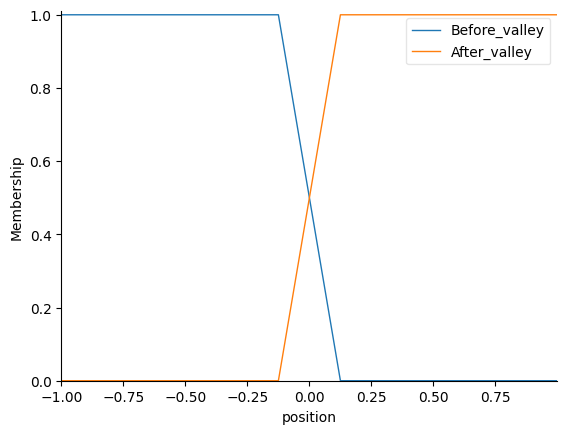

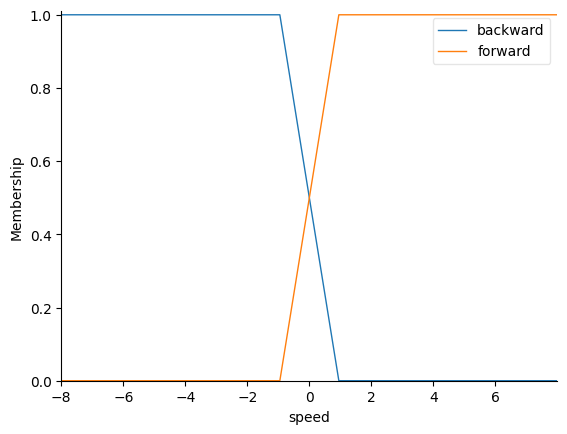

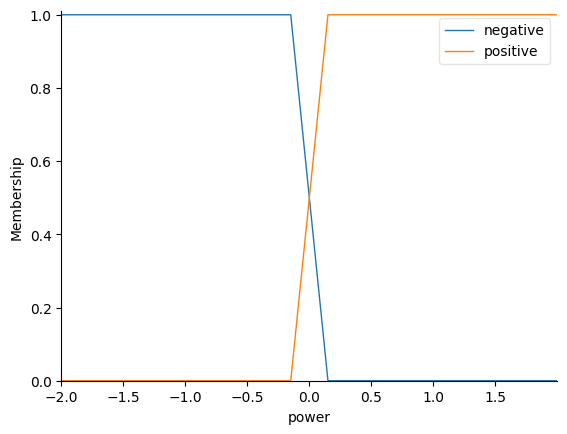

In [36]:
import numpy as np
import skfuzzy as fuzz
import gymnasium as gym
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl


position = ctrl.Antecedent(np.arange(-1.0, 1.0, 0.001), 'position')

position['Before_valley'] = fuzz.trapmf(position.universe, [-1.0, -1.0, -0.125, 0.125])
position['After_valley'] = fuzz.trapmf(position.universe, [-0.125, 0.125, 1.0, 1.0])

position.view()


speed = ctrl.Antecedent(np.arange(-8.0, 8.0, 0.001), 'speed')

speed['backward'] = fuzz.trapmf(speed.universe, [-8.0, -8.0, -0.95, 0.95])
speed['forward'] = fuzz.trapmf(speed.universe, [-0.95, 0.95, 8.0, 8.0])

speed.view()


power = ctrl.Consequent(np.arange(-2, 2, 0.001), 'power')

power['negative'] = fuzz.trapmf(power.universe, [-2, -2, -0.15, 0.15])
power['positive'] = fuzz.trapmf(power.universe, [-0.15, 0.15, 2, 2])

power.view()


rule1 = ctrl.Rule(position['Before_valley'] & speed['backward'], power['negative'])
rule2 = ctrl.Rule(position['Before_valley'] & speed['forward'], power['positive'])
rule3 = ctrl.Rule(position['After_valley'] & speed['backward'], power['negative'])
rule4 = ctrl.Rule(position['After_valley'] & speed['forward'], power['positive'])
controller = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
simulator = ctrl.ControlSystemSimulation(controller)


env = gym.make("Pendulum-v1", render_mode="human")

observation, _ = env.reset()
array = []
for _ in range(500):
    simulator.input['position'] = observation[0]
    simulator.input['speed'] = observation[1]
    simulator.compute()
    decision = simulator.output['power']

    observation, reward, terminated, truncated, info = env.step([decision])


    env.render()
    array.append(reward)
    if terminated:
        print(f'You Won in {_} iteration!')
        break

    if observation[0] > 0.99 and abs(observation[2]) < 1.5:
        print(f'You Won in {i} iterations!!!')
        break

env.close()




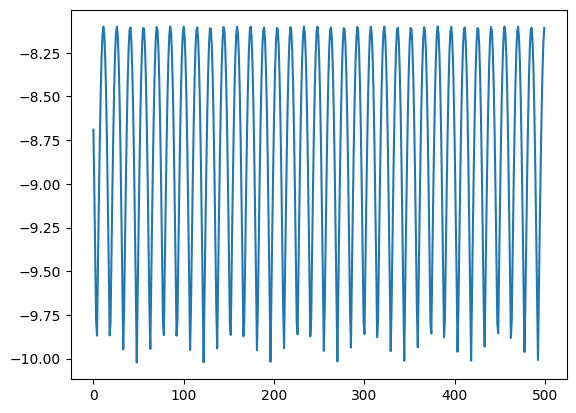

In [37]:
plt.plot(array)
plt.show()